#  Capstone Project - The Battle of the Neighborhoods (Week 2)

## Table of contents:

* ### *Introduction: Business Problem*
* ### *Data*
* ### *Methodology*
* ### *Analysis*
* ### *Results and Discussion*
* ### *Conclusion*

## Introduction: Business Problem

   The most popular US catamaran and pleasure yacht dealer wants to open a new branch in Canada. This dealer’s main office is on Lake Ontario on the US side.The dealer has a yacht salon and a service center.The main business is the short-term rental of yachts and boats, usually for the weekend. The second part of the business is the sale of boats and yachts.
   
   The dealer has a budget and the ability to open and run only one office in Canada. He is looking for the best place for his own business and new office. He plans to make street advertisements and attract new customers to a new office to close deals.
   Therefore, the place for the new office should be suitable for prospective customers and should be in the most promising place.
   
   Our goal is to find the best neighborhoods for the new office.The main criteria of our neighborhood are the prosperity and wealth of citizens, as well as the density of people with the same social status.They should be able to rent a boat or yacht at the weekend. Location density is essential for street advertising. The location of the new office should be in the Lake Ontario

## Data

The best city of Canada for new office of project is Toronto. <br>
And the best borough of Toronto is Downtown Toronto. <br>
For our Project we need list of all neigborhoods of Downtown Toronto <br>
Next step is finding of geographic coordinates for each neighborhood <br>
After we can use Foursqueare API and take list of venues and ratings for each area

### Neighborhoods Data:

The Wikipedia page was scraped to pull out the information:

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

The information contains postal codes, borough and neighborhoods. Later that was converted into a pandas data frame for further analysis.

  ### Let's Import all needed libraries.

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

### And Getting Data from Internet

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
Data_url = requests.get(url).text
Data=BeautifulSoup(Data_url, 'xml')

### Creating of new DataFrame

In [3]:
table=Data.find('table')
columns_names = ['Postal Code','Borough','Neighborhood']
df_toronto=pd.DataFrame(columns = columns_names)
table_rows = table.find_all('tr')

for tr in table_rows:
    row_data=[]
    for td in tr.find_all('td'):
        row_data.append(td.text.strip())
    if len(row_data)==3:
        df_toronto.loc[len(df_toronto)] = row_data
        
df_toronto=df_toronto[df_toronto['Borough']!='Not assigned']
df_toronto=df_toronto.reset_index(drop=True)
df_toronto['Neighborhood']=df_toronto['Neighborhood'].str.replace('/',',')

In [4]:
df_dt=df_toronto[df_toronto['Borough']=='Downtown Toronto']

In [5]:
df_dt=df_dt.reset_index(drop=True)

Now we have full list of neighborhoods of Downtown Toronto...

In [6]:
df_dt

,Postal Code,Borough,Neighborhood
0,M5A,Downtown Toronto,"Regent Park , Harbourfront"
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
2,M5B,Downtown Toronto,"Garden District, Ryerson"
3,M5C,Downtown Toronto,St. James Town
4,M5E,Downtown Toronto,Berczy Park
5,M5G,Downtown Toronto,Central Bay Street
6,M6G,Downtown Toronto,Christie
7,M5H,Downtown Toronto,"Richmond , Adelaide , King"
8,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is..."
9,M5K,Downtown Toronto,"Toronto Dominion Centre , Design Exchange"


 After we need geocoordinates (latitude and longitude)for each neighborhood. <br> We Download  coordinates from cocl.us and creating new data frame with coordinates

In [7]:
coordinates=pd.read_csv("http://cocl.us/Geospatial_data")
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
# Merging of Data Frames
df_merge = pd.merge(df_toronto,coordinates, on = 'Postal Code')

In [9]:
df_merge_dt=df_merge[df_toronto['Borough']=='Downtown Toronto']

In [10]:
df_merge_dt=df_merge_dt.reset_index(drop=True)

now we have full list of neighborhood of Downtown Toronto with coordinates..

In [11]:
df_merge_dt

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre , Design Exchange",43.647177,-79.381576


and full list of areas Toronto is...

In [17]:
df_merge.head(20)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [18]:
df_merge.shape

(103, 5)

Next step is importing of all needed libraries and packages for the following analyzes and visualizes

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")

In [12]:
%matplotlib inline
import json 
import xml
from geopy.geocoders import Nominatim
import pandas as pd 
from pandas.io.json import json_normalize 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

from sklearn.cluster import KMeans

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Let's take geografical coordinates  All areas of Toronto and make Map <BR>
##### Use library to get the latitude and longitude values 

In [19]:
address = 'Toronto'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Creating Map of Toronto using latitude and longitude values

In [21]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

In [22]:
for lat, lng, borough, neighborhood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Borough'], df_merge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Now we are going to use Foursquare API for exploring the neighborhoods/boroughs
### Also later we will create segmentation of results

lets to analyse only one borough - Down TOronto and create data frame for it

In [23]:
df_merge_dt.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre , Design Exchange",43.647177,-79.381576


In [26]:
address_dt = 'Downtown, Toronto'

geolocator_dt = Nominatim(user_agent="explorer")
location_dt = geolocator.geocode(address_dt)
latitude_dt = location_dt.latitude
longitude_dt = location_dt.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude_dt, longitude_dt))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


Next lets make Visualization of this borough..

In [29]:
map_dt = folium.Map(location=[latitude_dt, longitude_dt], zoom_start=11)

for lat, lng, label in zip(df_merge_dt['Latitude'], df_merge_dt['Longitude'], df_merge_dt['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dt)  
    
map_dt

Let's explore the Downtown Toronto for looking place for new office in our dataframe

In [82]:
df_merge_dt.head(5)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [184]:
print (' The Total neighborhoods of {} is {}'.format('Downtown Toronto ("df_merge_dt")',df_merge_dt.shape[0]))

 The Total neighborhoods of Downtown Toronto ("df_merge_dt") is 19


Define Foursquare Credentials and Version get the top 100 venues that within a radius of 700 meters

In [185]:
# The code was removed by Watson Studio for sharing.

In [193]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 700
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit= {}'.format(
    CLIENT_ID,CLIENT_SECRET, latitude_dt, longitude_dt, VERSION, radius, LIMIT)

Send the GET request and examine the resutls

In [194]:
results = requests.get(url).json()

In [195]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a dataframe.

In [196]:
venues = results['response']['groups'][0]['items']
   
nearby_venues = json_normalize(venues) # flatten JSON

In [197]:
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [198]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
1,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
2,LUSH,Cosmetics Shop,43.653557,-79.380400
3,Ed Mirvish Theatre,Theater,43.655102,-79.379768
4,Indigo,Bookstore,43.653515,-79.380696
5,CF Toronto Eaton Centre,Shopping Mall,43.654540,-79.380677
6,Yonge-Dundas Square,Plaza,43.656054,-79.380495
7,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
8,JOEY Eaton Centre,Restaurant,43.655404,-79.381929
9,Samsung Experience Store (Eaton Centre),Electronics Store,43.655648,-79.381011


In [199]:
print ('The Total venues is {}'.format(nearby_venues.shape[0]))

The Total venues is 100


Lets find top venues...

In [200]:
top=pd.Series(nearby_venues.categories)
top.value_counts()[:10]

Coffee Shop                  9
Café                         6
Hotel                        5
Restaurant                   4
Gastropub                    4
Middle Eastern Restaurant    3
Gym                          3
Japanese Restaurant          3
Bookstore                    2
Theater                      2
Name: categories, dtype: int64

### Exploring all Neighborhoods in Downtown Toronto

In [201]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

dt_venues = getNearbyVenues(names=df_merge_dt['Neighborhood'],
                                   latitudes=df_merge_dt['Latitude'],
                                   longitudes=df_merge_dt['Longitude']
                                  )

Regent Park , Harbourfront
Queen's Park , Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond , Adelaide , King
Harbourfront East , Union Station , Toronto Islands
Toronto Dominion Centre , Design Exchange
Commerce Court , Victoria Hotel
University of Toronto , Harbord
Kensington Market , Chinatown , Grange Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst
 Quay , South Niagara , Island airport
Rosedale
Stn A PO Boxes
St. James Town , Cabbagetown
First Canadian Place , Underground city
Church and Wellesley


In [202]:
dt_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park , Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
5,"Regent Park , Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
6,"Regent Park , Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
7,"Regent Park , Harbourfront",43.65426,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
8,"Regent Park , Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
9,"Regent Park , Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


In [203]:
dt_venues.shape

(1233, 7)

In [204]:
print('The total uniques categories is {}'.format(len(dt_venues['Venue Category'].unique())))
dt_venues.groupby('Neighborhood').count().head()

The total uniques categories is 201


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst\n Quay , South Niagara , Island airport",18,18,18,18,18,18
Central Bay Street,64,64,64,64,64,64
Christie,18,18,18,18,18,18
Church and Wellesley,75,75,75,75,75,75


### Lets Analyze Each Neighborhood

In [205]:
# one hot encoding
dt_onehot = pd.get_dummies(dt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Neighborhood'] = dt_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent

In [206]:
dt_onehot.shape

(1233, 201)

### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [207]:
dt_grouped = dt_onehot.groupby('Neighborhood').mean().reset_index()
dt_grouped.head(5)

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.018182,0.000000,0.0,0.000000,0.018182,0.000000,0.018182,0.036364,0.0,0.000000,0.0,0.018182,0.018182,0.0,0.036364,0.0,0.0,0.018182,0.000000,0.000000,0.000000,0.0,0.018182,0.0,0.000000,0.0,0.000000,0.000000,0.018182,0.036364,0.000000,0.000000,0.036364,0.000000,0.0,0.0,0.000000,0.036364,0.054545,0.0,0.0,0.0,0.0,0.0,0.018182,0.000000,0.018182,0.018182,0.018182,0.0,0.000000,0.0,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.018182,0.0,0.0,0.0,0.000000,0.036364,0.000000,0.0,0.018182,0.000000,0.0,0.0,0.018182,0.018182,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.018182,0.0,0.0,0.000000,0.018182,0.0,0.018182,0.036364,0.018182,0.018182,0.0,0.018182,0.000000,0.0,0.0,0.0,0.018182,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018182,0.0,0.0,0.018182,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.018182,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.036364,0.

Let's print each neighborhood along with the top 7 most common venues

In [208]:
num_top_venues = 7

for hood in dt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dt_grouped[dt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.05
1      Farmers Market  0.04
2              Bakery  0.04
3                Café  0.04
4  Italian Restaurant  0.04
5  Seafood Restaurant  0.04
6         Cheese Shop  0.04


----CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst
 Quay , South Niagara , Island airport----
                 venue  freq
0      Airport Service  0.17
1       Airport Lounge  0.11
2     Airport Terminal  0.11
3          Coffee Shop  0.06
4   Airport Food Court  0.06
5         Airport Gate  0.06
6  Rental Car Location  0.06


----Central Bay Street----
                       venue  freq
0                Coffee Shop  0.19
1         Italian Restaurant  0.06
2             Sandwich Place  0.05
3                       Café  0.05
4             Ice Cream Shop  0.03
5  Middle Eastern Restaurant  0.03
6            Bubble Tea Shop  0.03


----Christie----
           venue  freq
0  Grocery Store  0.22
1           Café  0.17
2  

### Take it to DataFrame.

In [225]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Lets Display the top 7 venues for each neighborhood.

In [226]:
num_top_venues = 7
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dt_grouped['Neighborhood']

for ind in np.arange(dt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Berczy Park,Coffee Shop,Seafood Restaurant,Italian Restaurant,Beer Bar,Farmers Market,Cocktail Bar,Bakery
1,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Airport,Airport Food Court,Airport Gate
2,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Sushi Restaurant,Spa
3,Christie,Grocery Store,Café,Park,Athletics & Sports,Gas Station,Italian Restaurant,Diner
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Restaurant,Sushi Restaurant,Yoga Studio,Pizza Place


### Clustering Neighborhoods

##### Run k-means to cluster the neighborhood into 6 clusters.

In [227]:
kclusters = 6

dt_grouped_clustering = dt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 3, 0, 4, 5, 1, 1, 5, 1, 5], dtype=int32)

Lets create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [228]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dt_merged = df_merge_dt

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dt_merged = dt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dt_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,5,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Mexican Restaurant,Café
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Gym,Park,Mexican Restaurant,Juice Bar,Italian Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Cosmetics Shop
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5,Café,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,American Restaurant,Hotel
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,5,Coffee Shop,Seafood Restaurant,Italian Restaurant,Beer Bar,Farmers Market,Cocktail Bar,Bakery


In [257]:
dt_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,5,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Mexican Restaurant,Café
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Gym,Park,Mexican Restaurant,Juice Bar,Italian Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Cosmetics Shop
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5,Café,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,American Restaurant,Hotel
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,5,Coffee Shop,Seafood Restaurant,Italian Restaurant,Beer Bar,Farmers Market,Cocktail Bar,Bakery
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Sushi Restaurant,Spa
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,4,Grocery Store,Café,Park,Athletics & Sports,Gas Station,Italian Restaurant,Diner
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568,1,Coffee Shop,Café,Restaurant,Gym,Hotel,Deli / Bodega,Thai Restaurant
8,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752,1,Coffee Shop,Aquarium,Italian Restaurant,Restaurant,Hotel,Café,Sporting Goods Shop
9,M5K,Downtown Toronto,"Toronto Dominion Centre , Design Exchange",43.647177,-79.381576,1,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Salad Place,Gastropub


### And we ready to visualize it..

In [256]:
map_clusters = folium.Map(location=[latitude_dt, longitude_dt], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['Latitude'], dt_merged['Longitude'], dt_merged['Neighborhood'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### We  found that the center of toronto is divided into 6 districts depending on venues 
 
### Now we can compare all areas with a rating of housing prices, a rating of restaurants and schools ...
### Lets Examine each Clusters.

Display each claster... 

In [246]:
df0=dt_merged.loc[dt_merged['Cluster Labels'] == 0,dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df1=dt_merged.loc[dt_merged['Cluster Labels'] == 1,dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df2=dt_merged.loc[dt_merged['Cluster Labels'] == 2,dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df3=dt_merged.loc[dt_merged['Cluster Labels'] == 3,dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df4=dt_merged.loc[dt_merged['Cluster Labels'] == 4,dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df5=dt_merged.loc[dt_merged['Cluster Labels'] == 5,dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]


###  Claster #1

In [247]:
df0

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
1,"Queen's Park , Ontario Provincial Government",0,Coffee Shop,Diner,Gym,Park,Mexican Restaurant,Juice Bar,Italian Restaurant
5,Central Bay Street,0,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Sushi Restaurant,Spa


###  Claster #2

In [248]:
df1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
7,"Richmond , Adelaide , King",1,Coffee Shop,Café,Restaurant,Gym,Hotel,Deli / Bodega,Thai Restaurant
8,"Harbourfront East , Union Station , Toronto Is...",1,Coffee Shop,Aquarium,Italian Restaurant,Restaurant,Hotel,Café,Sporting Goods Shop
9,"Toronto Dominion Centre , Design Exchange",1,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Salad Place,Gastropub
10,"Commerce Court , Victoria Hotel",1,Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Seafood Restaurant
17,"First Canadian Place , Underground city",1,Coffee Shop,Café,Restaurant,Hotel,Gym,Steakhouse,Gastropub


###  Claster #3

In [249]:
df2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
14,Rosedale,2,Park,Trail,Playground,Dance Studio,Dumpling Restaurant,Donut Shop,Doner Restaurant


###  Claster #4

In [250]:
df3

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
13,"CN Tower , King and Spadina , Railway Lands , ...",3,Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Airport,Airport Food Court,Airport Gate


###  Claster #5

In [251]:
df4

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
6,Christie,4,Grocery Store,Café,Park,Athletics & Sports,Gas Station,Italian Restaurant,Diner


###  Claster #6

In [252]:
df5

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,"Regent Park , Harbourfront",5,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Mexican Restaurant,Café
2,"Garden District, Ryerson",5,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Cosmetics Shop
3,St. James Town,5,Café,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,American Restaurant,Hotel
4,Berczy Park,5,Coffee Shop,Seafood Restaurant,Italian Restaurant,Beer Bar,Farmers Market,Cocktail Bar,Bakery
11,"University of Toronto , Harbord",5,Café,Italian Restaurant,Restaurant,Bar,Japanese Restaurant,Bookstore,Bakery
12,"Kensington Market , Chinatown , Grange Park",5,Café,Coffee Shop,Vietnamese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Bar,Dumpling Restaurant
15,Stn A PO Boxes,5,Coffee Shop,Café,Restaurant,Italian Restaurant,Seafood Restaurant,Hotel,Beer Bar
16,"St. James Town , Cabbagetown",5,Coffee Shop,Market,Restaurant,Italian Restaurant,Bakery,Café,Park
18,Church and Wellesley,5,Coffee Shop,Japanese Restaurant,Gay Bar,Restaurant,Sushi Restaurant,Yoga Studio,Pizza Place


### Lets make DataFrame and compare  Average Housing Prices

In [534]:
dt_homeprices=pd.DataFrame({"Neighborhood":df_merge_dt["Neighborhood"],
                                      "Home_Prices":[244000.0,345000.0,335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,425000.0,420500.0,470500.0,333500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,533500.0,433500.0]})

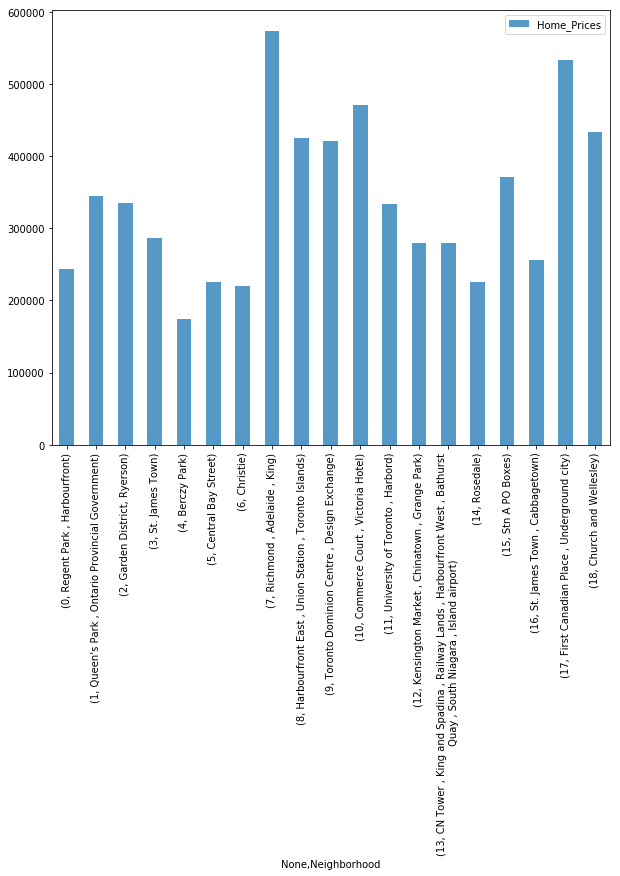

In [535]:
dt_homeprices.set_index('Neighborhood',append=True,inplace=True)
dt_homeprices.plot(kind='bar',figsize=(10,8),alpha=0.75)

In [408]:
dt_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,5,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Mexican Restaurant,Café
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Gym,Park,Mexican Restaurant,Juice Bar,Italian Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Cosmetics Shop
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5,Café,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,American Restaurant,Hotel
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,5,Coffee Shop,Seafood Restaurant,Italian Restaurant,Beer Bar,Farmers Market,Cocktail Bar,Bakery
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Sushi Restaurant,Spa
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,4,Grocery Store,Café,Park,Athletics & Sports,Gas Station,Italian Restaurant,Diner
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568,1,Coffee Shop,Café,Restaurant,Gym,Hotel,Deli / Bodega,Thai Restaurant
8,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752,1,Coffee Shop,Aquarium,Italian Restaurant,Restaurant,Hotel,Café,Sporting Goods Shop
9,M5K,Downtown Toronto,"Toronto Dominion Centre , Design Exchange",43.647177,-79.381576,1,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Salad Place,Gastropub


In [536]:
dt_merged['Avg Home Prices']=0
for i in range (19):     
    dt_merged['Avg Home Prices'].loc[i]=dt_homeprices['Home_Prices'].iloc[i]
 

### Compare restaurant ratings and find the best status

In [537]:
dt_restaurant_ratings=pd.DataFrame({"Neighborhood":dt_merged["Neighborhood"],
                                      "Top Restourant Rating":[7,4,5,8,10,10,7,10,8,9,10,2,7,2,3,8,6,8,5]})
dt_restaurant_ratings.set_index("Neighborhood",append=True,inplace=True)

and visualize it..

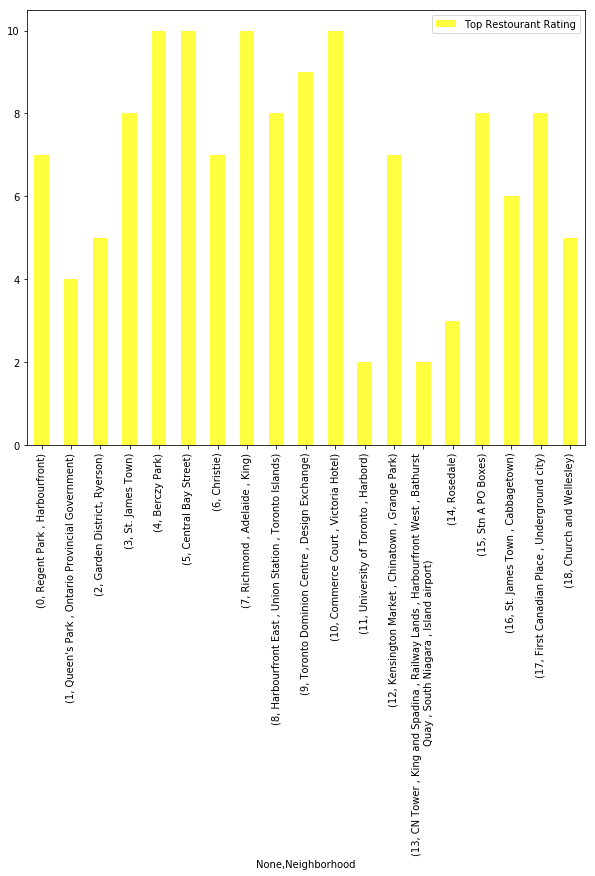

In [538]:

dt_restaurant_ratings.plot(kind='bar',figsize=(10,8),color='yellow',alpha=0.75)

In [539]:
#add columns initial
dt_merged['Restourant'] =0

In [540]:

for i in range (19):     
    dt_merged['Restourant'].loc[i]=dt_restaurant_ratings['Top Restourant Rating'].iloc[i]

### Compare restaurant ratings and find the best status

In [541]:
dt_schools_ratings=pd.DataFrame({"Neighborhood":dt_merged["Neighborhood"],
                                      "Top school Rating":[3,3,5,5,7,6,7,9,10,8,10,2,7,2,3,8,6,8,5]})
dt_schools_ratings.set_index("Neighborhood",append=True,inplace=True)

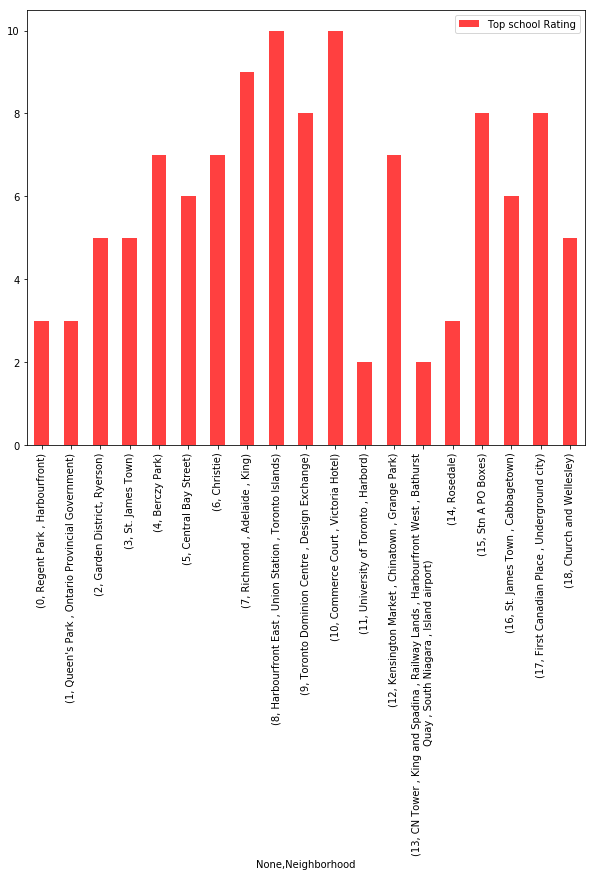

In [542]:
dt_schools_ratings.plot(kind='bar',figsize=(10,8),color='red',alpha=0.75)

In [543]:
#add columns initial
dt_merged['school_rating'] =0

In [544]:
for i in range (19):     
    dt_merged['school_rating'].loc[i]=dt_schools_ratings['Top school Rating'].iloc[i]

In [589]:
dt_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,Avg Home Prices,Restourant,school_rating
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,5,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Mexican Restaurant,Café,244000.0,7,3
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Diner,Gym,Park,Mexican Restaurant,Juice Bar,Italian Restaurant,345000.0,4,3
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,335000.0,5,5
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5,Café,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,American Restaurant,Hotel,286600.0,8,5
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,5,Coffee Shop,Seafood Restaurant,Italian Restaurant,Beer Bar,Farmers Market,Cocktail Bar,Bakery,175000.0,10,7


### Now we can find best claster for new office

to sorting by the most expensive houses...

In [573]:
best_claster=pd.DataFrame()
best_claster=dt_merged.groupby(['Avg Home Prices','Restourant','school_rating','Cluster Labels']).mean()

In [585]:
best_claster

Latitude  Longitude
Avg Home Prices Restourant school_rating Cluster Labels                      
175000.0        10         7             5               43.644771 -79.373306
219400.0        7          7             4               43.669542 -79.422564
225000.0        3          3             2               43.679563 -79.377529
225900.0        10         6             0               43.657952 -79.387383
244000.0        7          3             5               43.654260 -79.360636
255400.0        6          6             5               43.667967 -79.367675
279200.0        2          2             3               43.628947 -79.394420
                7          7             5               43.653206 -79.400049
286600.0        8          5             5               43.651494 -79.375418
333500.0        2          2             5               43.662696 -79.400049
335000.0        5          5             5               43.657162 -79.378937
345000.0        4          3             0               43.662301 -79.389494
370500.0        8          8             5               43.646435 -79.374846
420500.0        9          8             1               43.647177 -79.381576
425000.0        8          10            1               43.640816 -79.381752
433500.0        5          5             5               43.665860 -79.383160
470500.0        10         10            1               43.648198 -79.379817
533500.0        8          8             1               43.648429 -79.382280
573900.0        10         9             1               43.650571 -79.384568

### This result table show us -  the richest households with high-rated restaurants and schools located in segment number 1

to visualize it..


In [723]:
map_clusters = folium.Map(location=[latitude_dt, longitude_dt], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


In [724]:
dt_merged_best=pd.DataFrame(dt_merged)

In [725]:
for i in range(dt_merged_best.shape[0]): 
    if dt_merged.loc[i,'Cluster Labels'] !=1 : 
        dt_merged_best.drop([i],inplace = True)
        

In [726]:

dt_merged_best

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,Avg Home Prices,Restourant,school_rating
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568,1,Coffee Shop,Café,Restaurant,Gym,Hotel,Deli / Bodega,Thai Restaurant,573900.0,10,9
8,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752,1,Coffee Shop,Aquarium,Italian Restaurant,Restaurant,Hotel,Café,Sporting Goods Shop,425000.0,8,10
9,M5K,Downtown Toronto,"Toronto Dominion Centre , Design Exchange",43.647177,-79.381576,1,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Salad Place,Gastropub,420500.0,9,8
10,M5L,Downtown Toronto,"Commerce Court , Victoria Hotel",43.648198,-79.379817,1,Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Seafood Restaurant,470500.0,10,10
17,M5X,Downtown Toronto,"First Canadian Place , Underground city",43.648429,-79.382280,1,Coffee Shop,Café,Restaurant,Hotel,Gym,Steakhouse,Gastropub,533500.0,8,8


In [727]:

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged_best['Latitude'], dt_merged_best['Longitude'], dt_merged_best['Neighborhood'], dt_merged_best['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters),
    
       
map_clusters

### There is the best place for the new office.